Epoch 1/100


c:\Users\21276\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5581 - loss: 229.4259 - val_accuracy: 0.7741 - val_loss: 49.5254
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6672 - loss: 63.8661 - val_accuracy: 0.8002 - val_loss: 10.7366
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6692 - loss: 30.2056 - val_accuracy: 0.6766 - val_loss: 1.5645
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6028 - loss: 11.5114 - val_accuracy: 0.3543 - val_loss: 1.0254
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5335 - loss: 4.4009 - val_accuracy: 0.7432 - val_loss: 1.0179
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7273 - loss: 2.1935 - val_accuracy: 0.7325 - val_loss: 1.0199
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7274 - loss: 1.9208 - val_accuracy: 0.7325 - val_loss: 0.9750
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7399 - loss: 1.3967 - val_accuracy

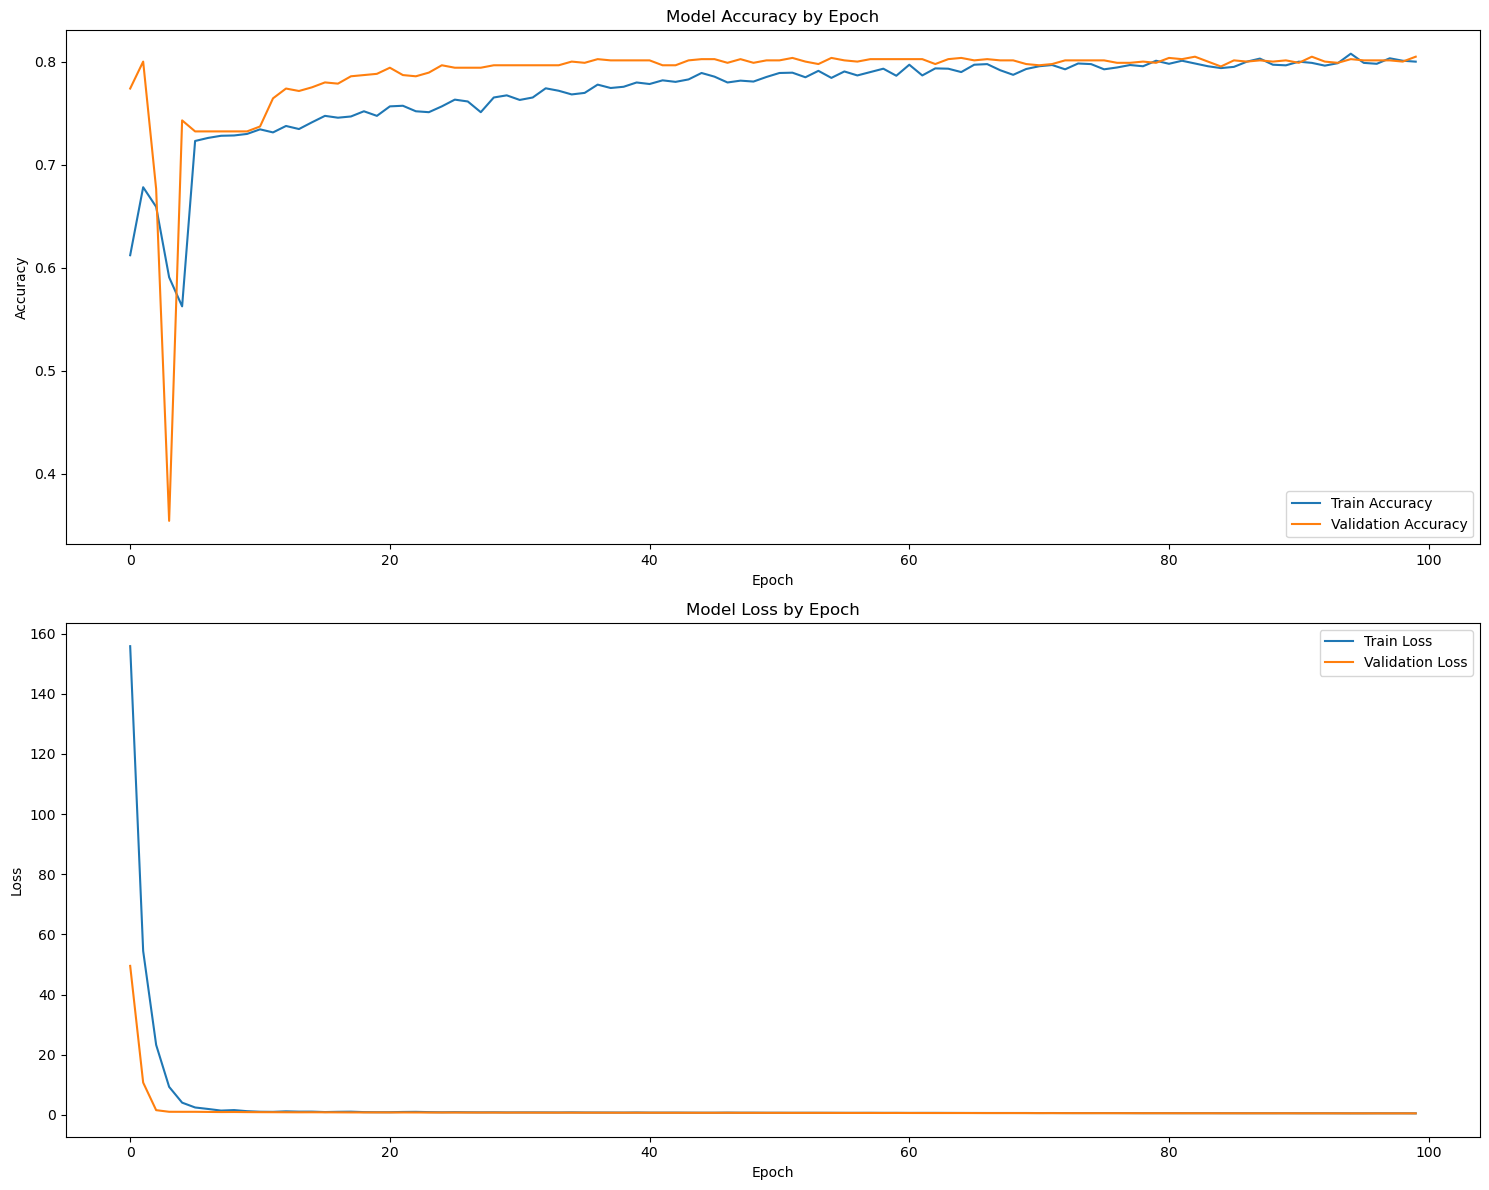

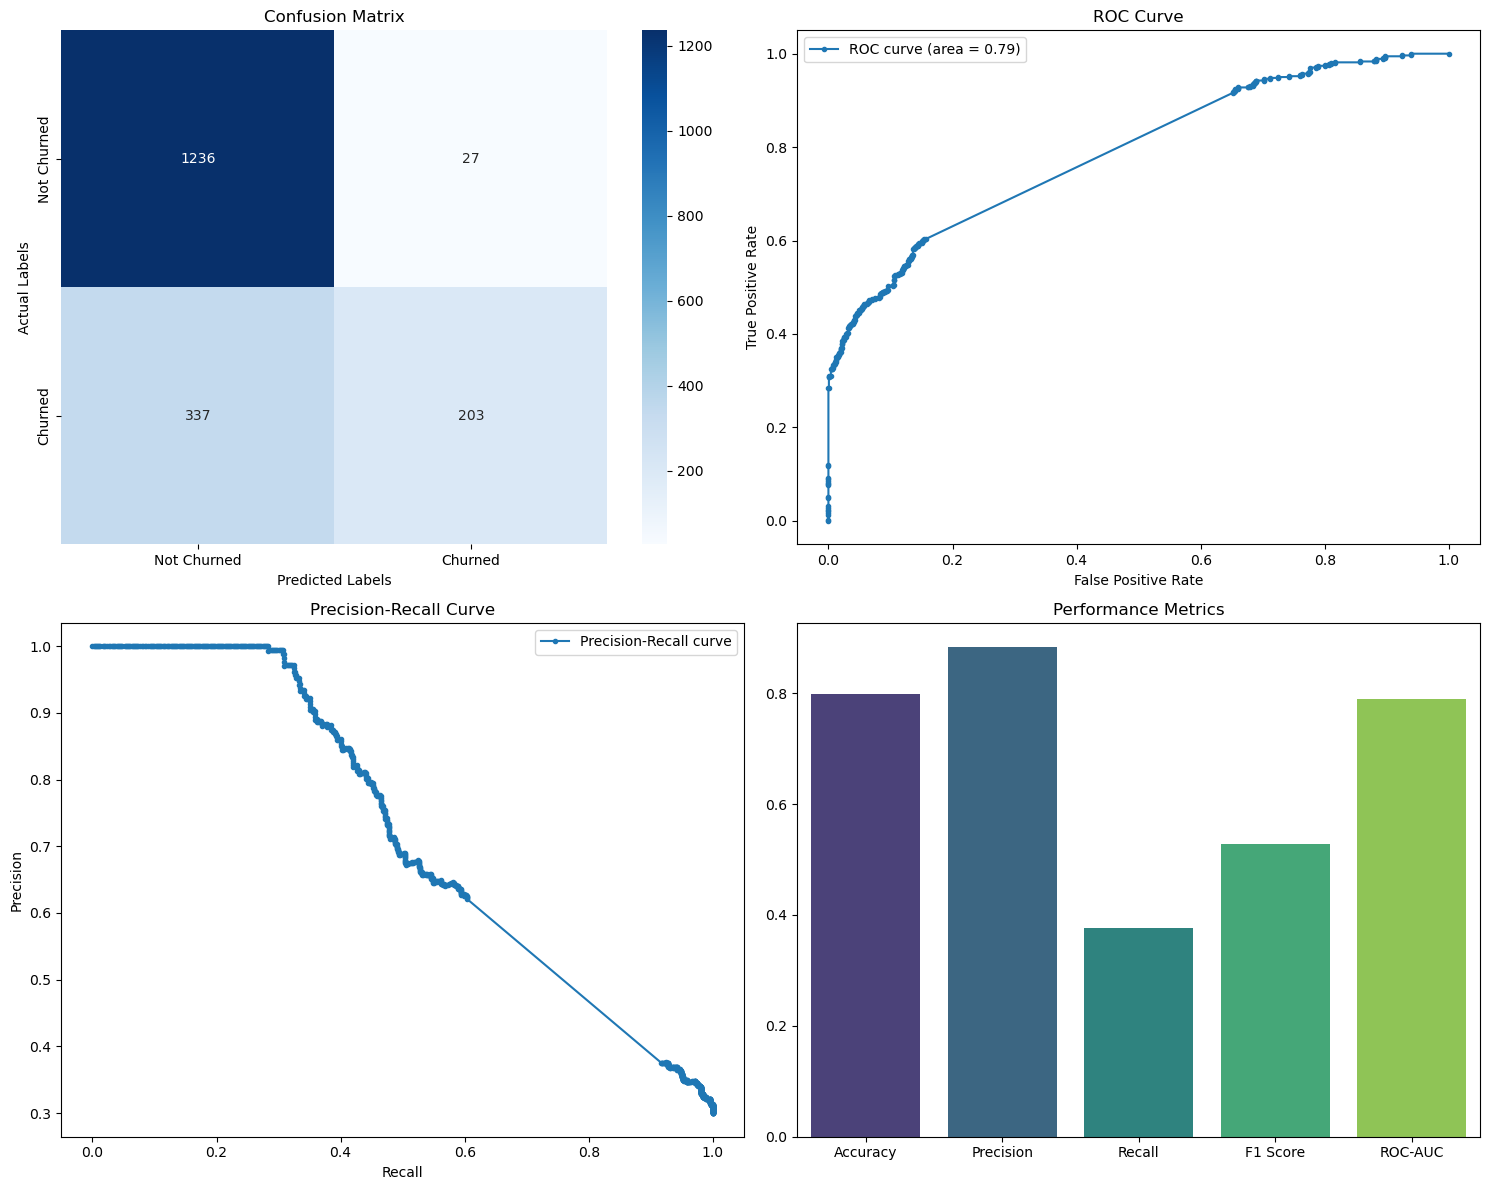

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

churn_stay_df = pd.read_csv('churn_stay.csv')
churn_stay_df['Churn_Status'] = churn_stay_df['Customer_Status'].apply(lambda x: 1 if x == 'Churned' else 0)
data = churn_stay_df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

columns_to_encode = ['Gender', 'Married', 'State', 'Value_Deal', 
                     'Phone_Service', 'Multiple_Lines','Internet_Service', 
                     'Internet_Type', 'Online_Security', 'Online_Backup','Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies','Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing','Payment_Method']

label_encoders = {col: LabelEncoder().fit(data[col]) for col in columns_to_encode}
for col in columns_to_encode:
  data[col] = label_encoders[col].transform(data[col])

X = data[['Contract', 'Total_Revenue', 'Total_Long_Distance_Charges', 'Total_Charges', 'Online_Security',
'Premium_Support', 'Internet_Service', 'Paperless_Billing', 'Value_Deal', 'Monthly_Charge', 'Age', 'Payment_Method']]
y = data['Churn_Status']

# Split data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# The model :
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=30, verbose=1)

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_test_pred_prob)

# Print metrics
print(f'Test Accuracy Score: {test_accuracy}')
print(f'Test Precision Score: {precision}')
print(f'Test Recall Score: {recall}')
print(f'Test F1 Score: {f1}')
print(f'Test ROC-AUC Score: {roc_auc}')
print('Test Confusion Matrix:')
print(conf_matrix)

# Plotting
plt.figure(figsize=(15, 12))

# Accuracy by Epoch
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Epoch')
plt.legend()

# Loss by Epoch
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss by Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Additional plots
plt.figure(figsize=(15, 12))

# Confusion Matrix
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')

# ROC Curve
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(2, 2, 3)
plt.plot(recall_curve, precision_curve, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Metrics Bar Plot
plt.subplot(2, 2, 4)
metrics = [test_accuracy, precision, recall, f1, roc_auc]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
sns.barplot(x=metric_names, y=metrics, palette='viridis')
plt.title('Performance Metrics')

plt.tight_layout()
plt.show()

In [35]:
# The new dataset :
new_data = pd.read_csv('joined.csv')

for col in columns_to_encode:
    new_data[col] = label_encoders[col].transform(new_data[col])

new_X = new_data[['Contract','Total_Revenue','Total_Long_Distance_Charges','Total_Charges','Online_Security',
         'Premium_Support','Internet_Service','Paperless_Billing','Value_Deal','Monthly_Charge','Age','Payment_Method']]

new_data['Churn_Status'] = (model.predict(new_X) > 0.5).astype(int).flatten()

new_data

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Churn_Status
0,93520-GUJ,0,67,0,5,13,19,4,1,1,...,72.10,72.10,0.0,0,7.77,79.87,Joined,Others,Others,1
1,57256-BIH,0,18,0,2,9,7,5,1,0,...,19.85,57.20,0.0,0,9.36,66.56,Joined,Others,Others,1
2,72357-MAD,0,53,0,11,14,12,4,1,0,...,44.30,44.30,0.0,0,42.95,87.25,Joined,Others,Others,1
3,66612-KAR,0,58,1,9,11,18,5,1,0,...,19.95,58.00,0.0,0,8.07,66.07,Joined,Others,Others,1
4,22119-WES,1,31,1,21,5,5,5,1,0,...,20.05,33.70,0.0,0,3.62,37.32,Joined,Others,Others,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,31412-HAR,0,81,1,6,14,29,5,1,0,...,19.20,37.20,0.0,0,14.06,51.26,Joined,Others,Others,1
407,54997-UTT,0,55,0,19,7,23,5,1,0,...,44.00,44.00,0.0,0,26.15,70.15,Joined,Others,Others,1
408,56728-RAJ,1,40,0,16,0,1,5,1,0,...,45.60,45.60,0.0,0,37.44,83.04,Joined,Others,Others,1
409,47624-TAM,0,62,1,17,7,29,5,1,0,...,-5.00,189.10,0.0,0,100.59,289.69,Joined,Others,Others,0


In [36]:
new_data.to_excel('results_NN.xlsx')